In [1]:
from run import *
print([var for var in locals().keys() if var == var.upper()])
from run import mk_prefix

['__', 'MACHS', 'FINER', 'GRIDS', 'SOLVERS', 'MACHINE', '___', '_']


In [39]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os.path
%matplotlib inline

In [3]:
execfile('../../matplotlibrc.py')

In [4]:
def line_to_arr(line):
    return np.array(line.strip().split(),dtype=float) 
def read_grid(grid):
    with open(grid) as f:
        f.readline()
        x = line_to_arr(f.readline())
        y = line_to_arr(f.readline())    
    return x, y
def read_dat(prefix, folder, var):
    filename = os.path.join(folder, '%s_%s.dat' % (prefix, var))
    return np.genfromtxt(filename, unpack=True)
def mk_airfoil_mask(x):
    return np.logical_and(x >= 19.5, x <= 21.5)

# Question 2

Provide a plot of the pressure coefficient along the airfoil surface with the negative
pointing upwards. Vary the freestream Mach number between [0.80, 0.90] with 0.02
increments. For each case, provide a convergence plot of the L∞-norm, surface pressure
coefficient as a function of x, and pressure contour for x ∈ [20, 21] and y ∈ [0, 1]. Discuss
your findings. A four order reduction in the residual is sufficient for the Gauss-Seidel
method

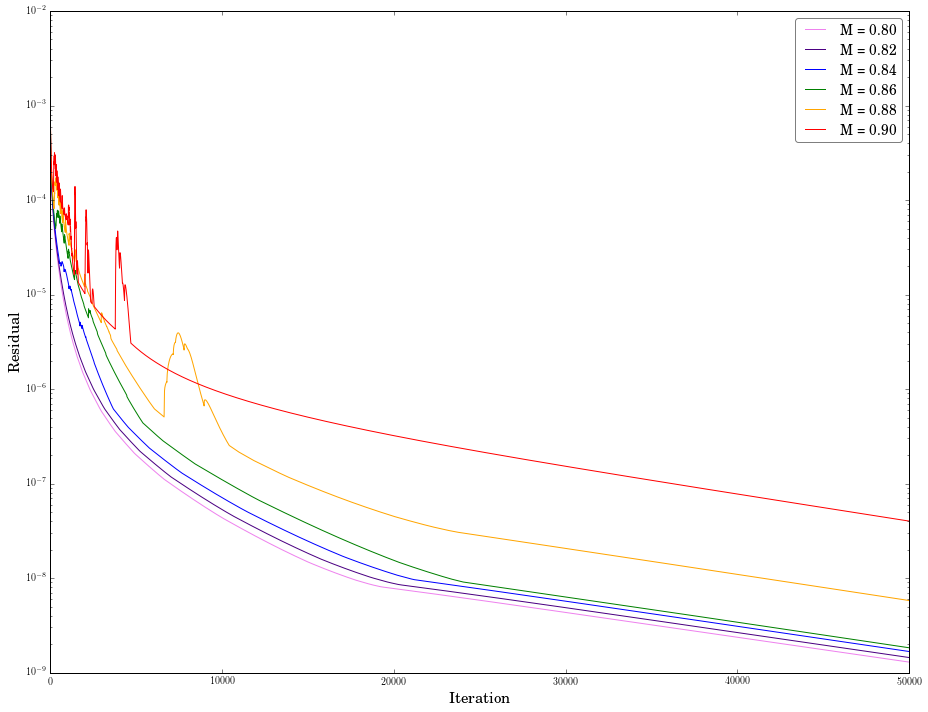

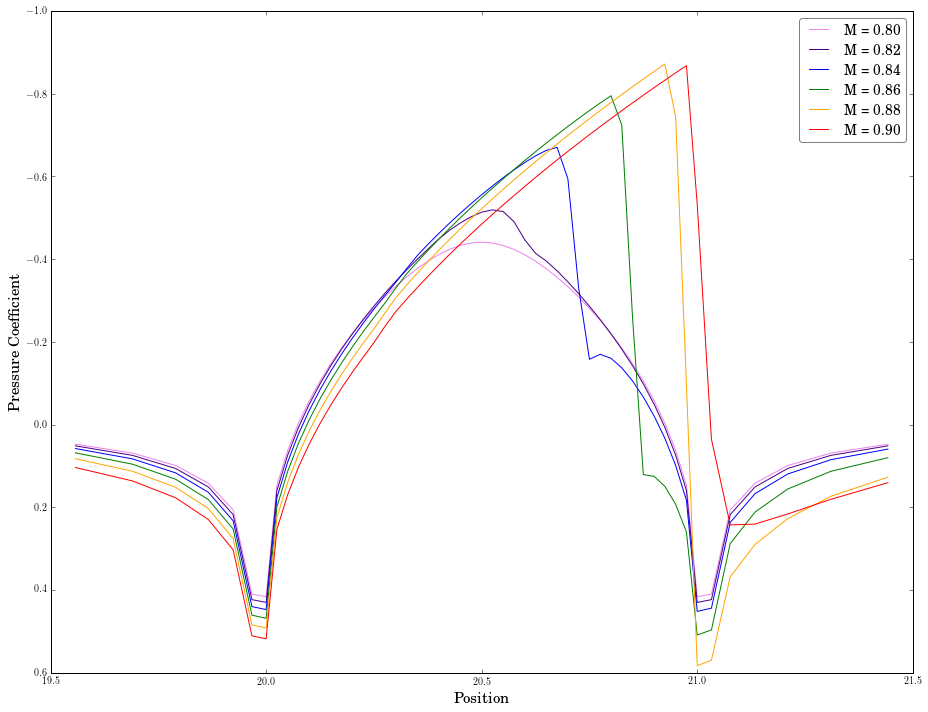

In [13]:
# Convergence Plots
fig1, ax1 = plt.subplots(figsize=(13, 10))
fig2, ax2 = plt.subplots(figsize=(13, 10))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax2.set_xlabel('Position')
ax2.set_ylabel('Pressure Coefficient')
folder = MACHINE['folder']
grid = MACHINE['grids'][0]
solver = MACHINE['solvers'][0]
machs = MACHINE['machs']
x, y = read_grid(grid)
airfoil = mk_airfoil_mask(x)
colors = ['r', 'orange', 'green', 'blue', 'indigo', 'violet']
for mach, color in zip(machs, reversed(colors)):
    prefix = mk_prefix(grid=grid, solver=solver.name, mach=mach)
    label = 'M = %.2f' % mach
    r = read_dat(prefix, folder, 'r')
    Cp = read_dat(prefix, folder, 'Cp')
    ax2.plot(x[airfoil], Cp[0, airfoil], label=label, color=color)
    ax1.semilogy(r[:50001], label=label, color=color)
ax1.legend()
ax2.legend()
ax2.invert_yaxis()
# fig.suptitle('Pressure contours for various Mach numbers', fontsize=24)
fig1.tight_layout()
fig2.tight_layout()
plt.show()
fig1.savefig('tex/figs/q2_plots_1.pdf')
fig2.savefig('tex/figs/q2_plots_2.pdf')

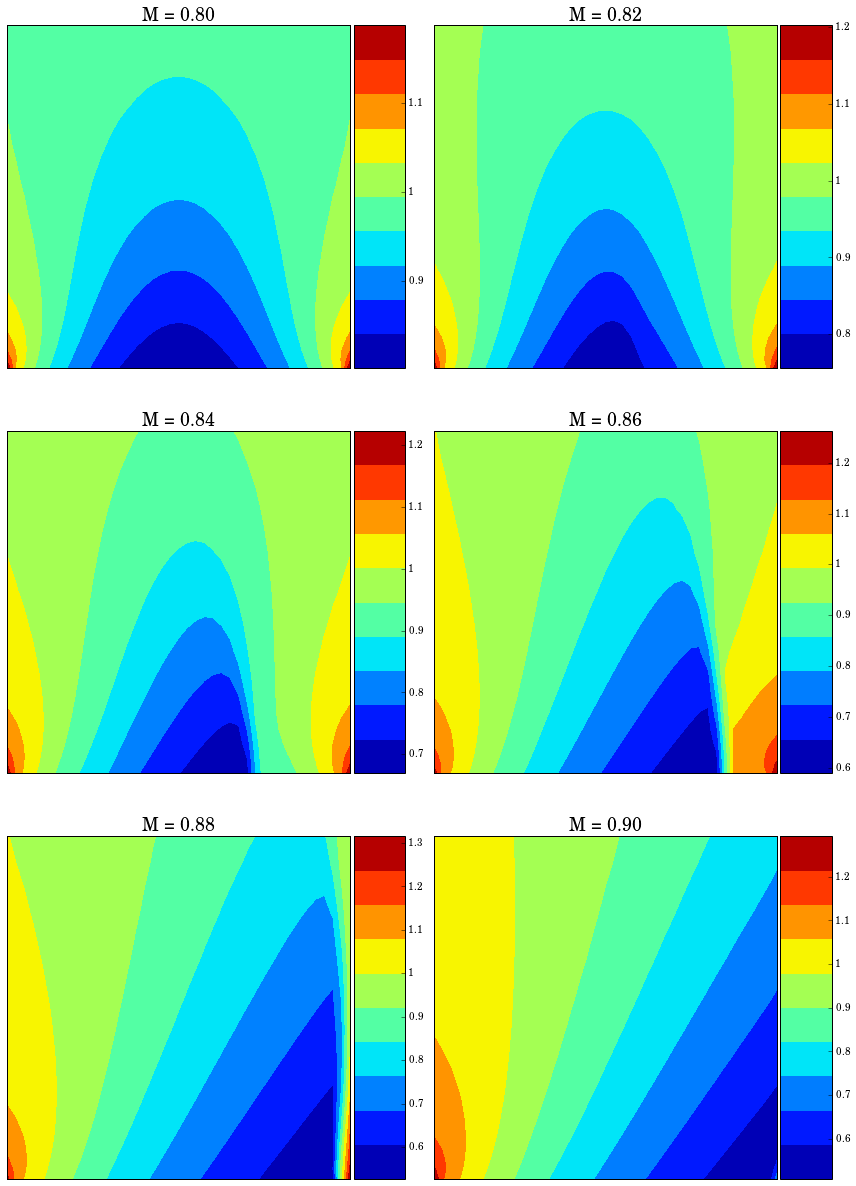

In [54]:
# Contour plots
# http://roman.coffee/blog/2015/01/24/plotting-multiple-subplots-with-colorbars-in-python/
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))
# levels = np.linspace(0.7, 1.4, 11)
folder = MACHINE['folder']
grid = MACHINE['grids'][0]
solver = MACHINE['solvers'][0]
machs = MACHINE['machs']
x, y = read_grid(grid)
nlevels = 11

# sets the title to be displayed at the top of the figure.
# fig.suptitle('Pressure contours for various Mach numbers on coarse grid', fontsize=24)

for mach, ax in zip(machs, axes.flatten()):
    prefix = mk_prefix(grid=grid, solver=solver.name, mach=mach)
    title = 'M = %.2f' % mach
    P = read_dat(prefix, folder, 'P')
    levels = np.linspace(P.min(), P.max(), nlevels)
    cs = ax.contourf(x, y, P, levels=levels)
    ax.set_title(title)
    ax.set_xlim(20, 21)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal', 'box-forced')
    
    # creates a new axis, cax, located 0.05 inches to the right of ax, whose width is 15% of ax
    # cax is used to plot a colorbar for each subplot
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="15%", pad=0.05)
    cbar = plt.colorbar(cs, cax=cax, ticks=np.arange(0,10,.1), format="%.2g")
#     cbar.set_label('Colorbar {}'.format(i), size=10)

    # removes x and y ticks
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

# prevents each subplot's axes from overlapping
fig.tight_layout()

# moves subplots down slightly to make room for the figure title
fig.subplots_adjust(top=0.95)
fig.savefig('tex/figs/q2_contours.pdf', dpi=600)
plt.show()

# Question 3

Vary the grid size, by doubling it in each direction as well as the number of points on
the airfoil surface. Produce a coarse, medium, and fine grid. Plot the surface coefficient
of pressure as a function of x on the airfoil surface for the three grids on the same plot
at Mach 0.88. Discuss your findings. Does the shock location change.

In [32]:
a = 'sa' 
a.capitalize()

'Sa'

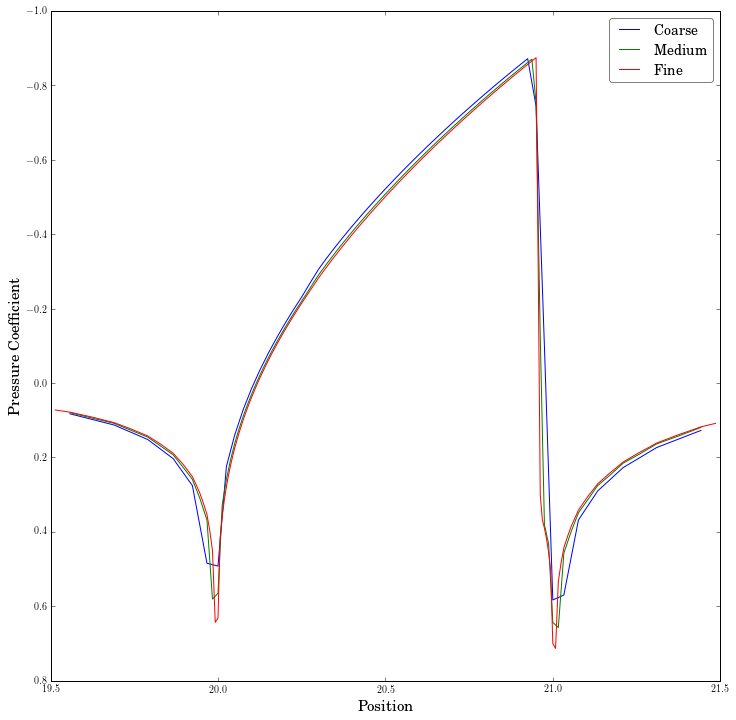

In [14]:
# Convergence Plots
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlabel('Position')
ax.set_ylabel('Pressure Coefficient')
folder = FINER['folder']
grids = GRIDS
solver = FINER['solvers'][0]
mach = 0.88
colors = ['b', 'g', 'r']
labels = ['Coarse', 'Medium', 'Fine']
for grid, color in zip(grids, colors):
    prefix = mk_prefix(grid=grid, solver=solver.name, mach=mach)
    x, y = read_grid(grid)
    airfoil = mk_airfoil_mask(x)
    label = grid.split('_')[1].capitalize()
    Cp = read_dat(prefix, folder, 'Cp')
    ax.plot(x[airfoil], Cp[0, airfoil], label=label, color=color)
    # Put points where the shock is
#     shock = np.logical_and(x >= 20.92, x <= 20.98)
#     ax.plot(x[shock], Cp[0, shock], 'o', color=color, mfc='none', mec=color)

ax.legend()
ax.invert_yaxis()
# ax.set_title('Pressure coefficient for various grids')
fig.savefig('tex/figs/q3.pdf')
plt.show()

# Question 4

Now solve the equations using line implicit Gauss-Seidel at a Mach number of 0.86 and
compare the convergence as a function of iterations and CPU time to that achieved by
the standard Gauss-Seidel approach. Both approaches must reach machine accuracy.

In [73]:
def normalize(d, key, fun):
    vals = {k: float(d[k][key]) for k in d.keys()}
    cf = fun(vals.values())
    for k in d.keys():
        d[k][key] /= cf

\begin{tabular}{@{} r c c c @{}}
    \toprule
    Solver & Time & Iterations & Time per Iteration \\
    \midrule

GS & 1.35 & 1.70 & 1.00 \\
LI & 1.00 & 1.00 & 1.26 \\

    \bottomrule
\end{tabular}


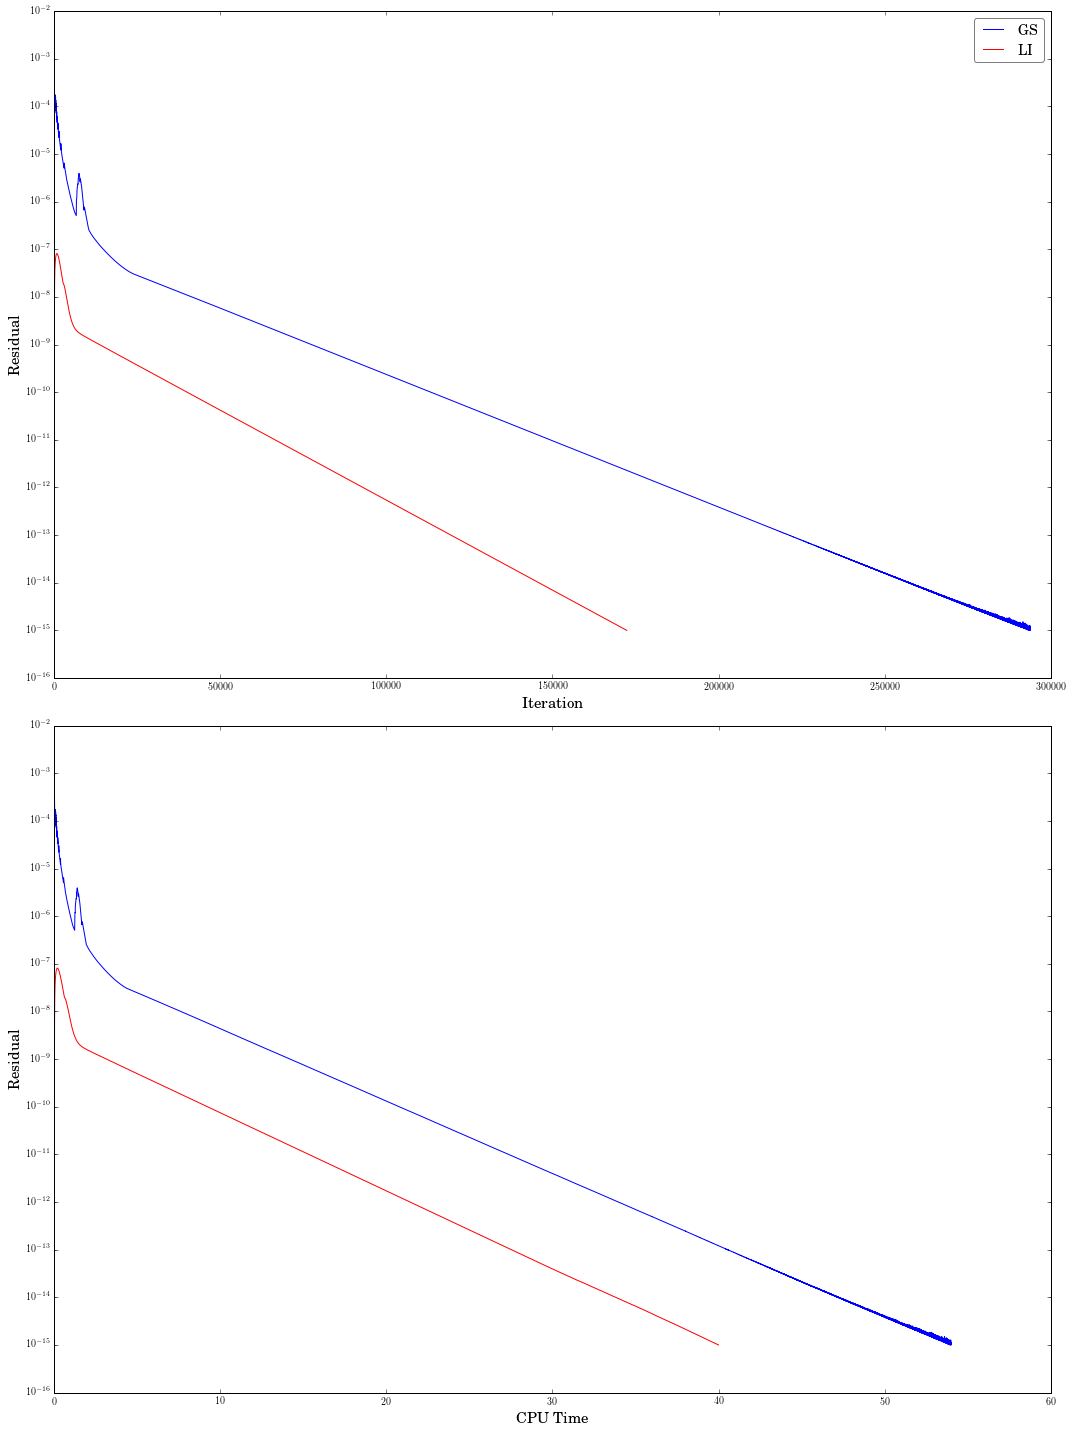

In [83]:
# Convergence Plots and Table

tablehead = r'''\begin{tabular}{@{} r c c c @{}}
    \toprule
    Solver & Time & Iterations & Time per Iteration \\
    \midrule
'''
tablefoot = r'''
    \bottomrule
\end{tabular}'''
lines = []

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 20))
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax2.set_xlabel('CPU Time')
ax2.set_ylabel('Residual')
folder = MACHINE['folder']
grid = MACHINE['grids'][0]
solvers = MACHINE['solvers']
machs = 0.86
colors = ['b', 'r']

vals = {}
for solver, color in zip(solvers, colors):
    prefix = mk_prefix(grid=grid, solver=solver.name, mach=mach)
    name = solver.name
    r = read_dat(prefix, folder, 'r')
    t = read_dat(prefix, folder, 't')
    
    # Plotting stuff
    ax1.semilogy(r, label=name, color=color)
    ax2.semilogy(t, r, label=name, color=color)
    
    # Table stuff
    vals[name] = {}
    time = t[-1]
    iters = len(t)
    vals[name]['time'] = time
    vals[name]['iters'] = iters
    vals[name]['tperi'] = time/iters
    
normalize(vals, 'time', min)
normalize(vals, 'iters', min)
normalize(vals, 'tperi', min)
for i, solver in enumerate(solvers):
    name = solver.name
    lines.append('{:s} & {time:.2f} & {iters:.2f} & {tperi:.2f} \\\\'.format(name, **vals[name]))
    
    
body = '\n'.join(lines)
table = '\n'.join([tablehead, body, tablefoot])
print(table)
open('tex/q4_table.tex', 'w').write(table)
    
ax1.legend()
fig.tight_layout()
fig.savefig('tex/figs/q4.pdf')
plt.show()

# Question 5
For a select grid size, plot the coefficient of pressure along the airfoil surface for Mach
number between [0.80, 0.90] with 0.02 increments on the same plot. Discuss your
observations. What is the effect of increasing the Mach number.

This is essentially the same as in Question 2...

In [ ]:
# Convergence Plots
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlabel('Position')
ax.set_ylabel('Pressure Coefficient')
folder = FINER['folder']
grid = FINER['grids'][-1]
solver = FINER['solvers'][0]
machs = FINER['machs']
x, y = read_grid(grid)
airfoil = mk_airfoil_mask(x)
colors = ['r', 'orange', 'green', 'blue', 'indigo', 'violet']
for mach, color in zip(machs, reversed(colors)):
    prefix = mk_prefix(grid=grid, solver=solver.name, mach=mach)
    label = 'M = %.2f' % mach
    Cp = read_dat(prefix, folder, 'Cp')
    ax.plot(x[airfoil], Cp[0, airfoil], label=label, color=color)

ax.legend()
ax.invert_yaxis()
fig.tight_layout()
fig.savefig('tex/figs/q5.pdf')
plt.show()
